# Overparametrization experiment
This notebook executes the experiment proposed by [Jason D. Lee at Simons Institute's 2019 Deep Learning Boot Camp](https://www.youtube.com/watch?v=uC2IGoTE2u4&t=680s), namely fitting data generated by a 50-neuron 2-layer neural network (NN) with random second layer weights. 

The goal is to expose how overparametrization aids optimization and generalization, despite the classical belief in statistics that overparametrized models would overfit to the data.

The teacher network input layer weights are the identity and the output layer weights are drawn from a Uniform({-1, 1}) distribution. 

The input data follows a standard normal of dimension equal to 50. The activation function is assumed to be ReLU. The output is assumed to be scalar. The loss function is the mean squared loss.

2-layer NNs with progressively bigger overparametrization scales(ratio between the number of hidden units fit and the number of hidden units in the true model) are fit to a sample of size 5000 for 10 epochs using Stochastic Gradient Descent(batch size = 1) and Gradient Descent (batch size = sample size) with learning rate equal to 0.001. Each overparametrization scale is trained 5 times and its average +/- 1 standard deviation are shown.

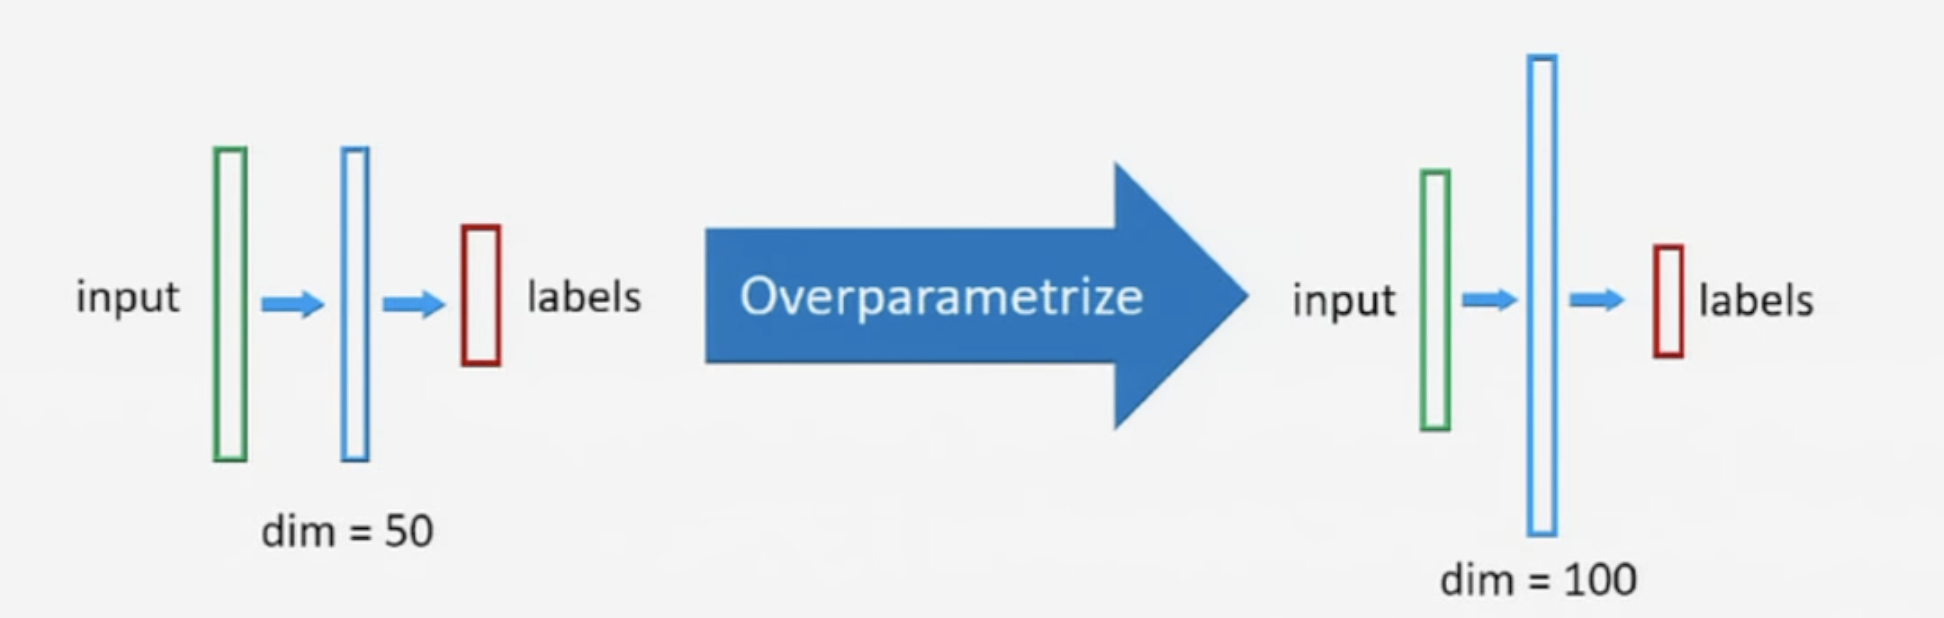

In [1]:
import ipycanvas

sgd_canvas, gd_canvas = ipycanvas.Canvas(), ipycanvas.Canvas()
sgd_canvas.width = gd_canvas.width = 1000; sgd_canvas.height = gd_canvas.height = 500; sgd_canvas.font = gd_canvas.font = "30px arial"
args = ('Results will appear as processed', sgd_canvas.width / 4, sgd_canvas.height / 3)
sgd_canvas.fill_text(*args); gd_canvas.fill_text(*args)

In [2]:
sgd_canvas

Canvas(width=1000)

In [3]:
gd_canvas

Canvas(width=1000)

In [4]:
from experiment import execute_experiment

experiment_results = execute_experiment(
    seed=123,
    input_dimension=50,
    output_dimension=1,
    sample_size=5000,
    batch_size=1,
    epochs=10,
    learning_rate=1e-3,
    models_overparametrizations=[0.5, 1, 2, 4, 8, 16, 32, 64],
    runs_per_model=5,
    save_models_path='./models/',
    save_experiments_path='./experiments/',
    plot_results_on_canvas=sgd_canvas,
    verbose=False
)

experiment_results = execute_experiment(
    seed=123,
    input_dimension=50,
    output_dimension=1,
    sample_size=5000,
    batch_size=5000,
    epochs=100,
    learning_rate=1e-3,
    models_overparametrizations=[0.5, 1, 2, 4, 8, 16, 32, 64],
    runs_per_model=5,
    save_models_path='./models/',
    save_experiments_path='./experiments/',
    plot_results_on_canvas=gd_canvas,
    verbose=False
)